In [2]:
!pip install tensorflow

In [3]:
!pip install keras

In [26]:
from tensorflow import keras
import numpy as np
from functions import build_model
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [5]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
#dividindo por 255 para escalar os pixels entre 0 e 1
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
#hidden_layer_size = [8, 16, 32, 64, 128, 256]
#learning_rate = [0.001, 0.01, 0.05, 0.1, 0.25, 0.5]
hidden_layer_size = [8, 64, 256]
learning_rate = [0.001, 0.01, 0.05]
activation = ["relu"]

In [10]:
best_sz, best_lr, best_func = 0, 0, ""
best_acc = 0

In [11]:
for sz in hidden_layer_size:
    for lr in learning_rate:
        for func in activation:
            
            model = build_model(sz, lr, func)
            model.fit(X_train, y_train, epochs=10)
            y_pred = np.argmax(model.predict(X_valid), axis=-1)
            accuracy = accuracy_score(y_valid, y_pred)
            
            if accuracy > best_acc:
                best_acc = accuracy
                best_sz, best_lr, best_func = sz, lr, func

Epoch 1/10
1719/1719 [==============================] - 5s 1ms/step - loss: 2.1577 - accuracy: 0.2463
Epoch 2/10
1719/1719 [==============================] - 2s 941us/step - loss: 1.6571 - accuracy: 0.4541
Epoch 3/10
1719/1719 [==============================] - 2s 903us/step - loss: 1.3306 - accuracy: 0.6096
Epoch 4/10
1719/1719 [==============================] - 2s 935us/step - loss: 1.0949 - accuracy: 0.6937
Epoch 5/10
1719/1719 [==============================] - 2s 918us/step - loss: 0.9427 - accuracy: 0.7350
Epoch 6/10
1719/1719 [==============================] - 2s 943us/step - loss: 0.8446 - accuracy: 0.7615
Epoch 7/10
1719/1719 [==============================] - 2s 933us/step - loss: 0.7663 - accuracy: 0.7862
Epoch 8/10
1719/1719 [==============================] - 2s 942us/step - loss: 0.7142 - accuracy: 0.7997
Epoch 9/10
1719/1719 [==============================] - 2s 921us/step - loss: 0.6646 - accuracy: 0.8137
Epoch 10/10
1719/1719 [==============================] - 2s 920us/

1719/1719 [==============================] - 3s 2ms/step - loss: 0.1685 - accuracy: 0.9535
Epoch 1/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.5817 - accuracy: 0.8438
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2127 - accuracy: 0.9400
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1565 - accuracy: 0.9558
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1253 - accuracy: 0.9647
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0978 - accuracy: 0.9733
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0863 - accuracy: 0.9771
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0726 - accuracy: 0.9802
Epoch 8/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0646 - accuracy: 0.9823
Epoch 9/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0550 - accuracy

In [12]:
print(best_sz, best_lr, best_func)

256 0.05 relu


In [13]:
final_model = build_model(best_sz, best_lr, best_func)

In [14]:
final_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_9 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = final_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 12s 6ms/step - loss: 0.5975 - accuracy: 0.8376 - val_loss: 0.2283 - val_accuracy: 0.9372
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2146 - accuracy: 0.9374 - val_loss: 0.1632 - val_accuracy: 0.9552
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1500 - accuracy: 0.9579 - val_loss: 0.1307 - val_accuracy: 0.9658
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1195 - accuracy: 0.9669 - val_loss: 0.1144 - val_accuracy: 0.9684
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0981 - accuracy: 0.9730 - val_loss: 0.0999 - val_accuracy: 0.9730
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0819 - accuracy: 0.9772 - val_loss: 0.0926 - val_accuracy: 0.9750
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0754 - accuracy: 0.9793 - val_loss: 0.0832 - val_accuracy

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df_losses = pd.DataFrame(history.history)
df_losses

,loss,accuracy,val_loss,val_accuracy
0,0.376512,0.896273,0.228319,0.9372
1,0.197963,0.943273,0.163182,0.9552
2,0.146846,0.959200,0.130718,0.9658
3,0.117148,0.967255,0.114427,0.9684
4,0.097528,0.973109,0.099949,0.9730
5,0.083474,0.976727,0.092589,0.9750
6,0.072833,0.979891,0.083211,0.9766
7,0.064309,0.982455,0.080419,0.9784
8,0.057115,0.984400,0.077883,0.9774
9,0.051257,0.986182,0.073872,0.9782


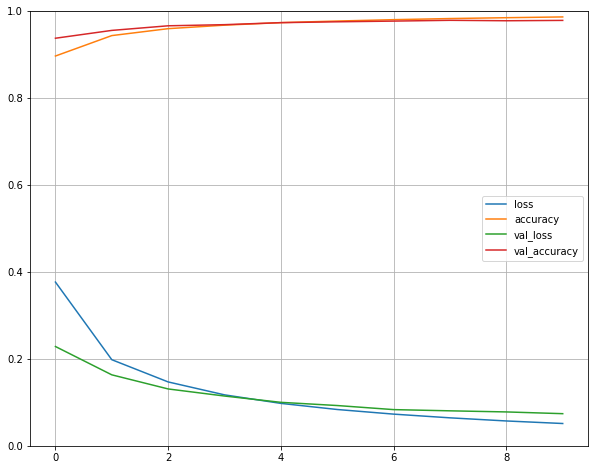

In [17]:
df_losses.plot(figsize=(10,8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Validation curve e training curve proximas -> baixo risco de overfitting

*O erro do dataset de validação é computado após o treinamento da epoch, enquanto do treino é durante, por isso a curva de validação parece performar melhor que a de treino 

Parametros que podem ser tunados:

- learning rate
- tentar outro optimizer
- numero de camadas, neurons por camadas, tipos de funções de ativação para cada hidden layer
- batch size (padrão 32), que é tunado no fit
- class_weight, caso o dataset seja muito assimetrico (para dar mais peso para classe pouco representada)

In [18]:
final_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 11.6791 - accuracy: 0.9749


[11.67912769317627, 0.9749000072479248]

In [20]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
y_pred = np.argmax(finalmodel.predict(X_new), axis=-1)
y_pred

In [24]:
print(confusion_matrix(y_test, y_pred))

[[ 971    0    1    2    2    0    1    1    1    1]
 [   0 1120    3    2    0    1    4    1    4    0]
 [   5    2 1007    3    2    0    2    6    5    0]
 [   0    0    3  995    0    3    0    3    3    3]
 [   2    0    2    1  959    0    3    1    2   12]
 [   6    0    0    8    1  862    8    1    5    1]
 [   6    2    1    1    5    2  940    0    1    0]
 [   2    5    7    4    0    0    0  994    4   12]
 [   5    1    2    7    3    2    6    3  944    1]
 [   4    4    0    7    6    1    1    3    2  981]]


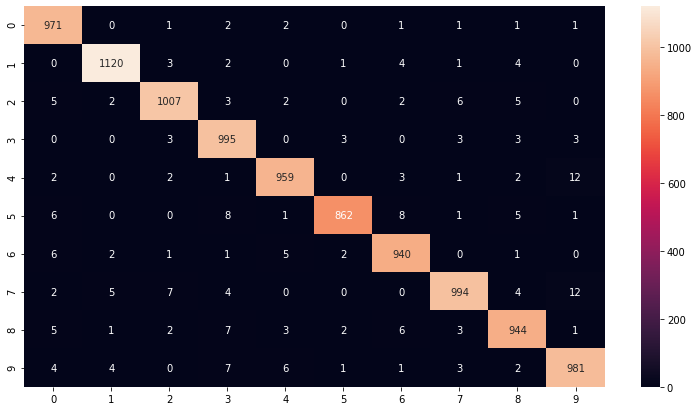

In [33]:
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

plt.figure(figsize = (13,7))
sns.heatmap(df_cm, annot=True, fmt='d')

In [28]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average=None)
precision = precision_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

print('f1 score:', f1)
print('precision:', precision)
print('recall:', recall)
print('accuracy', accuracy)

f1 score: [0.98031297 0.98721904 0.97862002 0.9754902  0.97857143 0.97787862
 0.97763911 0.97403234 0.97069409 0.97128713]
precision: [0.97002997 0.98765432 0.98148148 0.96601942 0.9805726  0.98966705
 0.97409326 0.98124383 0.97219361 0.97032641]
recall: [0.99081633 0.98678414 0.97577519 0.98514851 0.97657841 0.96636771
 0.98121086 0.96692607 0.96919918 0.97224975]
accuracy 0.9773
